# xarray (ex - xray) - "рентгеним" 4-мерные геоданные, в том числе и netcdf

###  [N-D labeled arrays and datasets in Python](http://xarray.pydata.org/en/stable/index.html)

### [Pandas!](http://pandas.pydata.org/)

Все это творения рук компании

[![visit PyData web page for new ](https://pydata.org/images/logo.png)](https://pydata.org/)

Стандартный набор пакетов для нашего первого анализа

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
cd ~/Data/CMEMS/Armor3d/

/home/mizyuk/Data/CMEMS/Armor3d


In [3]:
sns.set_style('whitegrid')

In [4]:
plt.rcParams['figure.dpi'] = 120

In [5]:
ls

armor_2005_2006.nc     armor_sss_week.yaml  ferret.jnl
armor_bs_2014_2016.nc  armor.yaml           sss_2005_2015.nc


In [6]:
ds = xr.open_dataset('sss_2005_2015.nc')

In [7]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 27, longitude: 69, time: 625)
Coordinates:
  * time       (time) datetime64[ns] 2005-01-05 2005-01-12 2005-01-19 ...
  * longitude  (longitude) float32 25.875 26.125 26.375 26.625 26.875 27.125 ...
  * latitude   (latitude) float32 40.875 41.125 41.375 41.625 41.875 42.125 ...
Data variables:
    sos        (time, latitude, longitude) float64 37.94 nan nan nan nan nan ...
    dos        (time, latitude, longitude) float64 1.028e+03 nan nan nan nan ...
Attributes:
    title:            Global analysed sea surface salinity and density
    institution:      CNR
    references:       Buongiorno Nardelli B. (2012). A novel approach for the...
    source:            
    Conventions:      CF-1.0
    history:          Data extracted from dataset http://misgw-armor.vlandata...
    time_min:         482232.0
    time_max:         587064.0
    julian_day_unit:  hours since 1950-01-01 00:00:00
    latitude_min:     40.875
    latitude_max:     47.375
   

In [8]:
ds.coords

Coordinates:
  * time       (time) datetime64[ns] 2005-01-05 2005-01-12 2005-01-19 ...
  * longitude  (longitude) float32 25.875 26.125 26.375 26.625 26.875 27.125 ...
  * latitude   (latitude) float32 40.875 41.125 41.375 41.625 41.875 42.125 ...

In [9]:
ds.sos.loc['2005-01-05']

<xarray.DataArray 'sos' (latitude: 27, longitude: 69)>
array([[ 37.939999,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ..., 
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
    time       datetime64[ns] 2005-01-05
  * longitude  (longitude) float32 25.875 26.125 26.375 26.625 26.875 27.125 ...
  * latitude   (latitude) float32 40.875 41.125 41.375 41.625 41.875 42.125 ...
Attributes:
    _CoordinateAxes:  time latitude longitude 
    long_name:        analysed sea surface salinity
    standard_name:    sea_surface_salinit

### Быстрая и качественная визуализация результатов с минимальными трудозатратами

Тот самый pcolor...

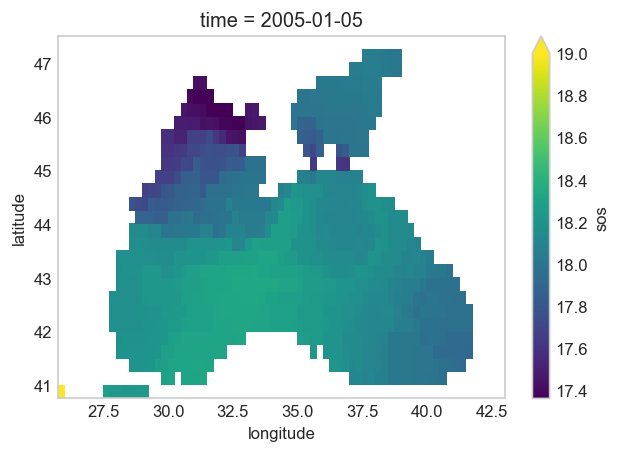

In [10]:
ds.sos.loc['2005-01-05'].plot(vmax=19)

Тот самый contourf...

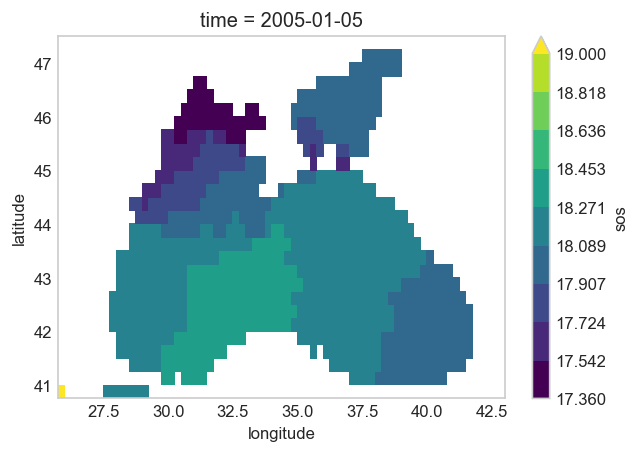

In [11]:
ds.sos.loc['2005-01-05'].plot(levels=10,vmax=19)

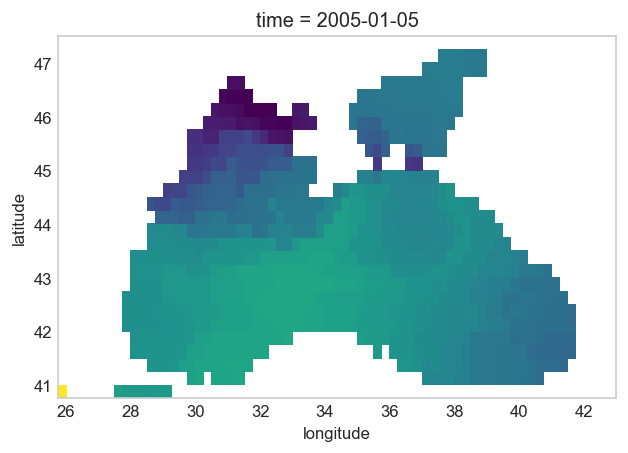

In [12]:
ds.sos.loc['2005-01-05'].plot(vmax=19,add_colorbar=False)

Выборка и разрезы

In [13]:
ds.sos.isel(time=range(4))

<xarray.DataArray 'sos' (time: 4, latitude: 27, longitude: 69)>
array([[[ 37.939999,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[ 38.149999,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[ 38.239999,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[ 38.319999,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
      

4 рисунка в одну! ~~длинную~~ строку кода

/opt/miniconda2/envs/FERRET/lib/python2.7/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


<Figure size 960x480 with 0 Axes>

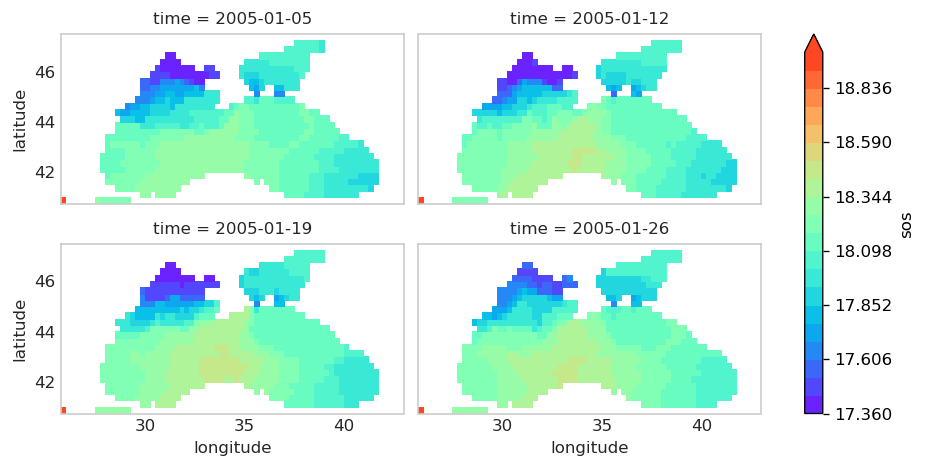

In [14]:
plt.figure(figsize=plt.figaspect(0.5))
ds.sos.isel(time=range(4)).plot(x='longitude',y='latitude',col='time',
                                    col_wrap=2,cmap='rainbow',vmax=19.,
                                    levels=21,figsize=plt.figaspect(0.5))

...И снова к картографическим проекциям

In [15]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
LAND = cfeature.NaturalEarthFeature(category='physical', scale='50m', name='land',color = cfeature.COLORS['land'])

/opt/miniconda2/envs/FERRET/lib/python2.7/site-packages/matplotlib/ticker.py:1852: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


In [16]:
plt.rcParams['figure.dpi'] = 120
sns.set_style('whitegrid')

Все тоже самое, но с береговой чертой

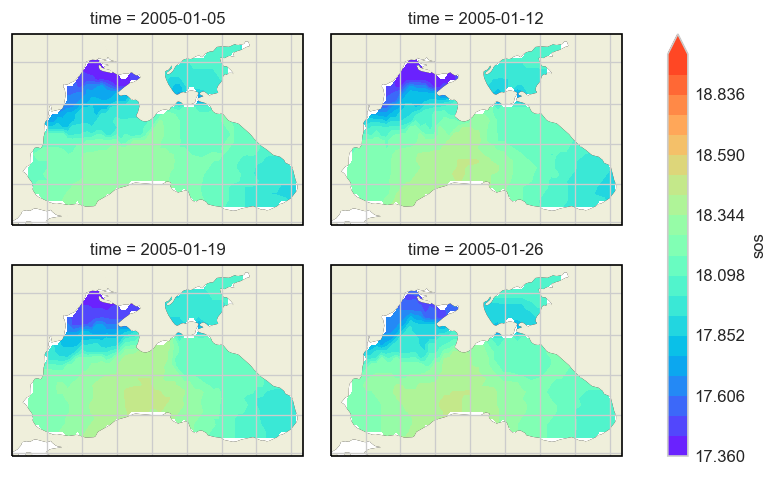

In [17]:
# plt.figure(figsize=plt.figaspect(0.5))
p = ds.sos.isel(time=range(4)).plot.contourf(transform=ccrs.PlateCarree(),
                                             x='longitude',y='latitude',col='time',
                                             col_wrap=2,cmap='rainbow',vmax=19.,
                                             levels=21,subplot_kws=dict(projection= ccrs.Mercator()),
                                             figsize=plt.figaspect(0.5),
                                             add_colorbar=True)
for ax in p.axes.flat:
    ax.set_extent([27,42,40.4,47.5])
    ax.coastlines('50m')
    ax.gridlines()
    ax.add_feature(LAND)

Допиливаем к статье!

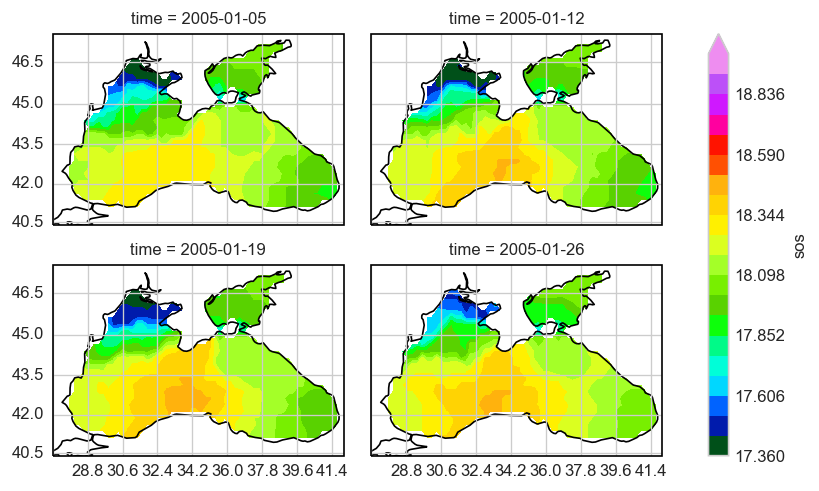

In [18]:
# plt.figure(figsize=plt.figaspect(0.5))
p = ds.sos.isel(time=range(4)).plot.contourf(transform=ccrs.PlateCarree(),
                                             x='longitude',y='latitude',col='time',
                                             col_wrap=2,cmap='gist_ncar',vmax=19.,
                                             levels=21,subplot_kws=dict(projection= ccrs.Mercator()),
                                             figsize=plt.figaspect(0.5),
                                             add_colorbar=True)
for iax,ax in enumerate(p.axes.flat):
    ax.set_extent([27,42,40.4,47.5])
    ax.coastlines('50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    if iax==0:
        gl.xlabels_bottom = False
    elif iax==1:
        gl.ylabels_left = gl.xlabels_bottom = False
    elif iax==3:
        gl.ylabels_left = False


Выбираем год

In [19]:
ds.sos.loc['2005']

<xarray.DataArray 'sos' (time: 52, latitude: 27, longitude: 69)>
array([[[ 37.939999,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[ 38.149999,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       ..., 
       [[ 37.399999,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[ 33.319999,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,      

Осредняем по пространству и рисуем сразу

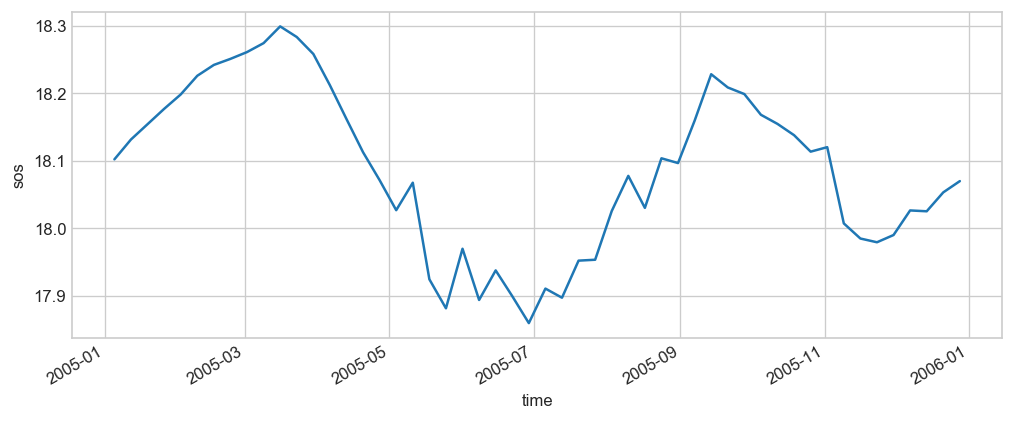

In [20]:
plt.figure(figsize=plt.figaspect(0.4))
ds.sos.loc['2005'].mean(dim=['longitude','latitude']).plot()

Средства, аналогичные pandas, для агрегации

In [21]:
ds.sos.loc['2005'].resample('M','time')

<xarray.DataArray 'sos' (time: 12, latitude: 27, longitude: 69)>
array([[[ 38.162499,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[ 38.472499,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       ..., 
       [[ 37.761999,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[ 36.342499,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,      

In [22]:
monthly = _

In [23]:
monthly.time

<xarray.DataArray 'time' (time: 12)>
array(['2005-01-31T00:00:00.000000000', '2005-02-28T00:00:00.000000000',
       '2005-03-31T00:00:00.000000000', '2005-04-30T00:00:00.000000000',
       '2005-05-31T00:00:00.000000000', '2005-06-30T00:00:00.000000000',
       '2005-07-31T00:00:00.000000000', '2005-08-31T00:00:00.000000000',
       '2005-09-30T00:00:00.000000000', '2005-10-31T00:00:00.000000000',
       '2005-11-30T00:00:00.000000000', '2005-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2005-01-31 2005-02-28 2005-03-31 ...

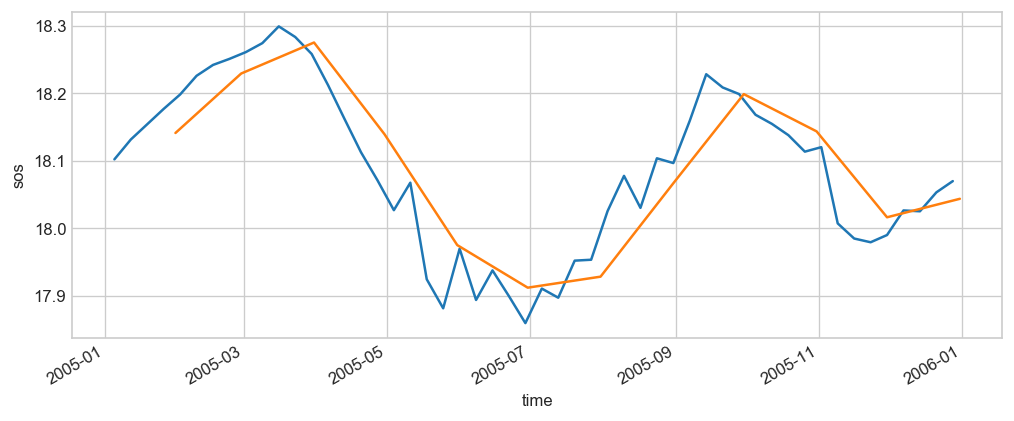

In [24]:
plt.figure(figsize=plt.figaspect(0.4))
ds.sos.loc['2005'].mean(dim=['longitude','latitude']).plot()
monthly.mean(dim=['longitude','latitude']).plot()


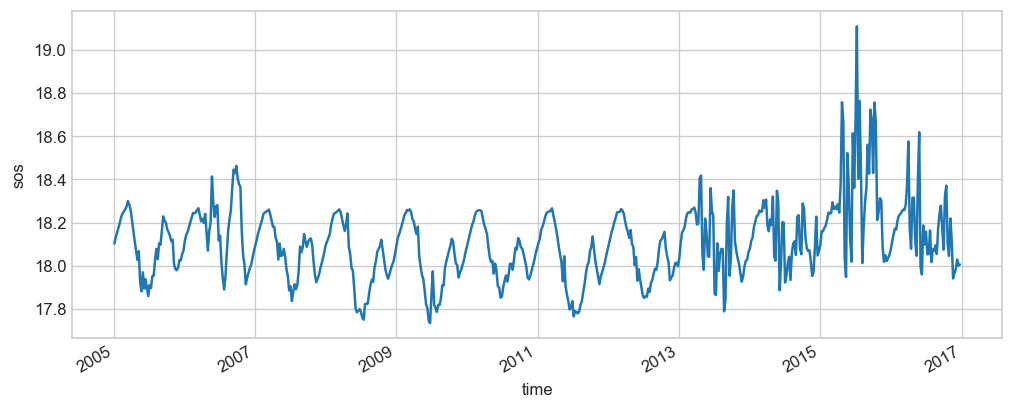

In [25]:
plt.figure(figsize=plt.figaspect(0.4))
ds.sos.mean(dim=['longitude','latitude']).plot()

In [26]:
ds.longitude.max()

<xarray.DataArray 'longitude' ()>
array(42.875)

In [27]:
eastpart = ds.sos.sel(longitude=slice(34.,ds.longitude.max()))

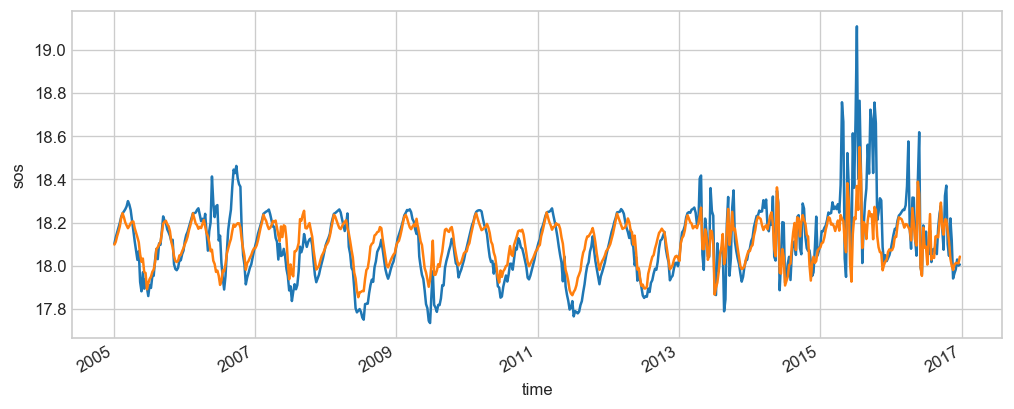

In [28]:
plt.figure(figsize=plt.figaspect(0.4))
ds.sos.mean(dim=['longitude','latitude']).plot()
eastpart.mean(dim=['longitude','latitude']).plot()

В 2014-2016 какая-то дополнительная изменчивость

In [43]:
ds.sos.loc['2015-01']

<xarray.DataArray 'sos' (time: 4, latitude: 27, longitude: 69)>
array([[[ 38.049999,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[ 29.559999,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[ 38.399999,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[ 38.609999,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan],
      

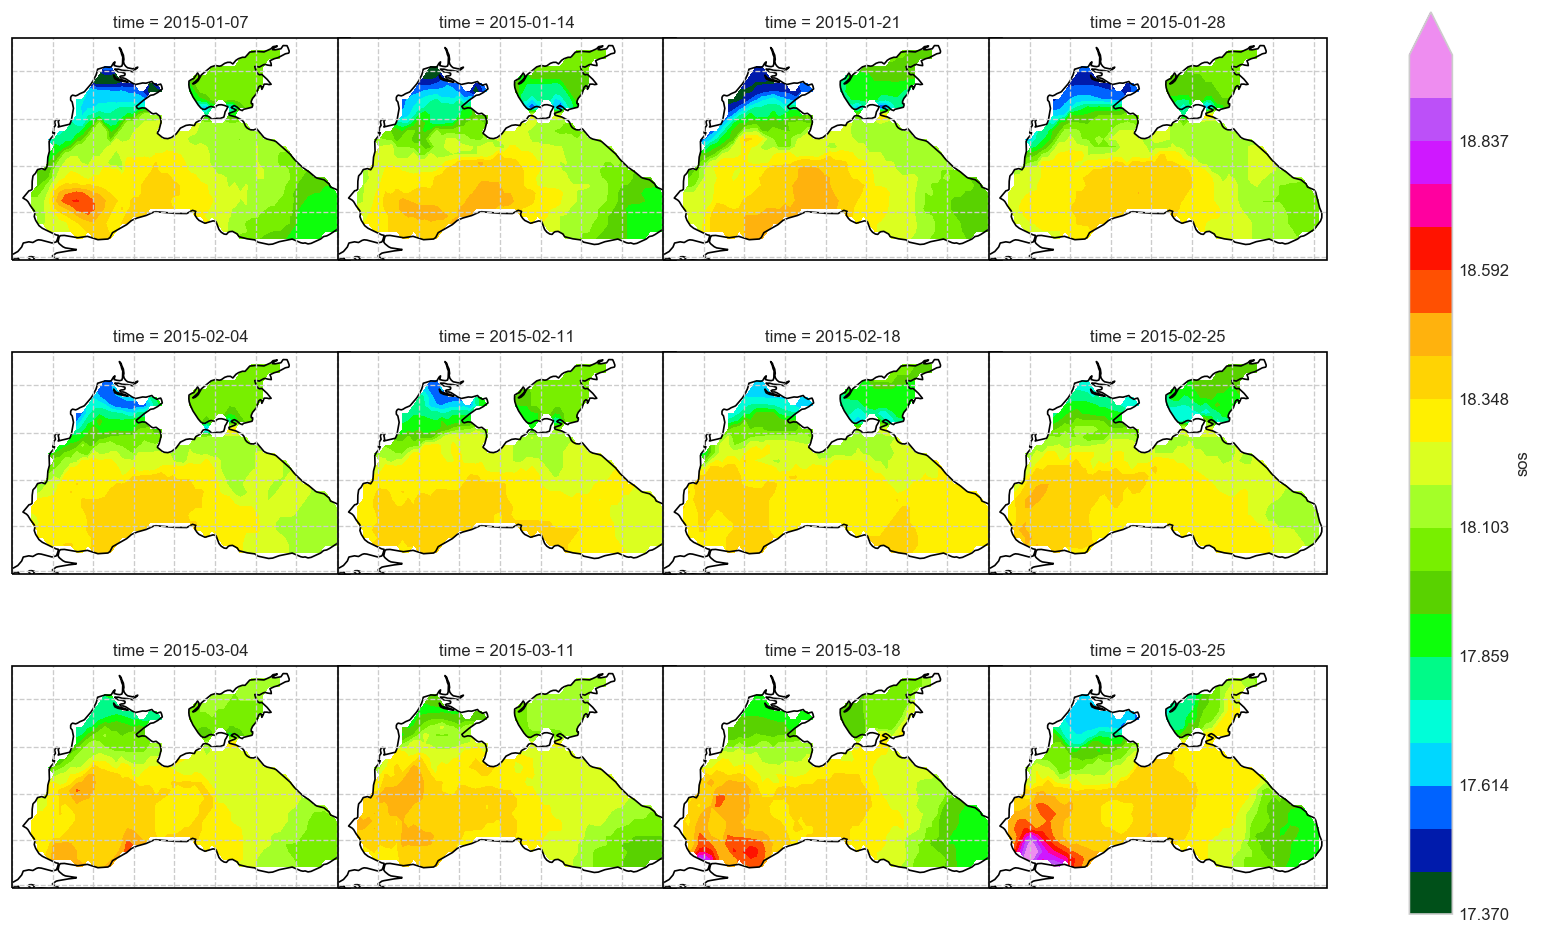

In [56]:
# plt.figure(figsize=plt.figaspect(0.5))
p = ds.sos.loc['2015-01':'2015-03'].plot.contourf(transform=ccrs.PlateCarree(),
                                                  x='longitude',y='latitude',col='time',
                                                  col_wrap=4,cmap='gist_ncar',vmax=19.,
                                                  levels=21,subplot_kws=dict(projection= ccrs.Mercator()),
                                                  figsize=(14,8),
                                                  add_colorbar=True)
for iax,ax in enumerate(p.axes.flat):
    ax.set_extent([27,42,40.4,47.5])
    ax.coastlines('50m')
    gl = ax.gridlines(linestyle='--')
#     gl.xlabels_top = gl.ylabels_right = False
#     if iax==0:
#         gl.xlabels_bottom = False
#     elif iax<4:
#         gl.ylabels_left = gl.xlabels_bottom = False
#     elif (iax>4):
#         gl.ylabels_left = False


In [29]:
nwshelf = ds.sos.sel(longitude=slice(29.,33.),latitude=slice(44.5,46.5))

Text(0,0.5,'surface salinity [psu]')

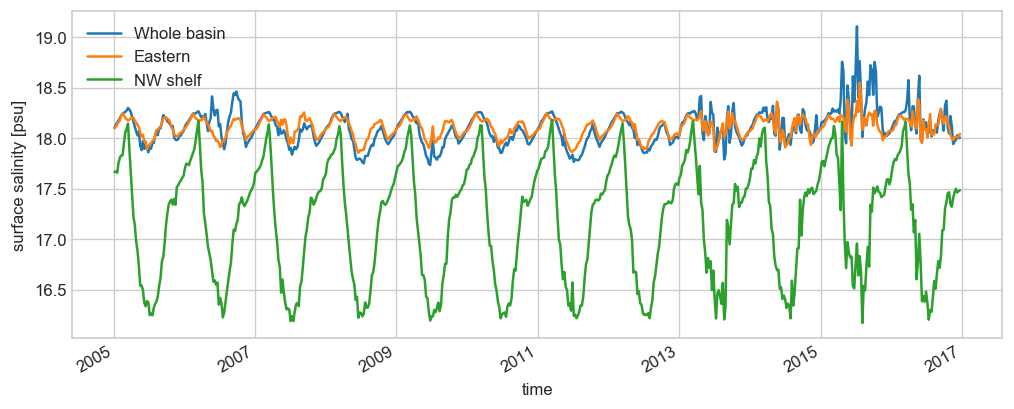

In [30]:
plt.figure(figsize=plt.figaspect(0.4))
ds.sos.mean(dim=['longitude','latitude']).plot(label='Whole basin')
eastpart.mean(dim=['longitude','latitude']).plot(label='Eastern')
nwshelf.mean(dim=['longitude','latitude']).plot(label='NW shelf')
plt.legend(loc='best')
ax = plt.gca()
ax.set_ylabel('surface salinity [psu]')

### Краткий экскурс в pandas (очень тесно связан с xarray)

In [31]:
sss = nwshelf.mean(dim=['longitude','latitude']).to_dataframe()

In [32]:
sss.head()

,sos
time,
2005-01-05,17.664239
2005-01-12,17.670434
2005-01-19,17.656956
2005-01-26,17.755652
2005-02-02,17.807717


In [33]:
sss = sss.rename(columns=dict(sos='nwshelf'))

In [34]:
sss.head()

,nwshelf
time,
2005-01-05,17.664239
2005-01-12,17.670434
2005-01-19,17.656956
2005-01-26,17.755652
2005-02-02,17.807717


In [35]:
sss['east'] = eastpart.mean(dim=['longitude','latitude']).to_dataframe()
sss['BS'] = ds.sos.mean(dim=['longitude','latitude']).to_dataframe()

In [36]:
sss.head()

,nwshelf,east,BS
time,,,
2005-01-05,17.664239,18.097877,18.102215
2005-01-12,17.670434,18.110590,18.131647
2005-01-19,17.656956,18.136652,18.154292
2005-01-26,17.755652,18.157242,18.176983
2005-02-02,17.807717,18.182078,18.198317


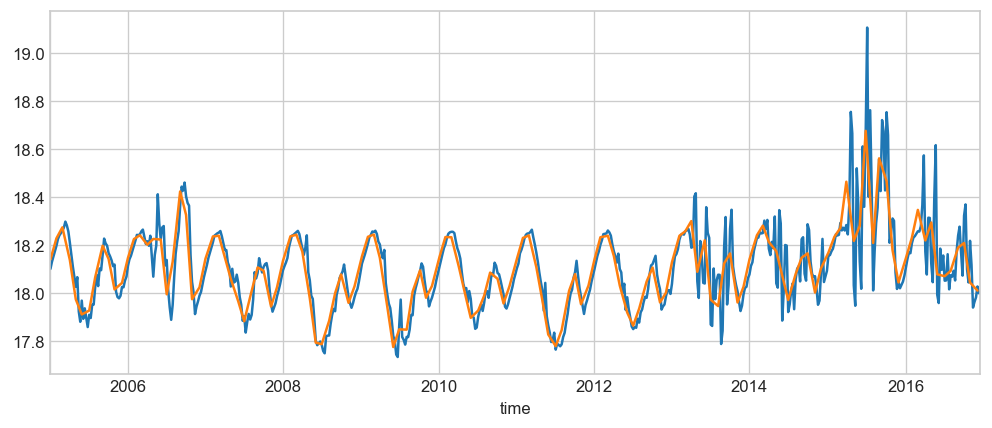

In [37]:
plt.figure(figsize=plt.figaspect(0.4))
sss.BS.plot()
sss.BS.resample('M').mean().plot()

In [38]:
monthly = sss.BS.resample('M').mean()

In [39]:
monthly = monthly.resample('W-WED').pad()

In [40]:
monthly.index[0]

Timestamp('2005-02-02 00:00:00', freq='W-WED')

In [41]:
anomaly = sss.BS[4:] - monthly

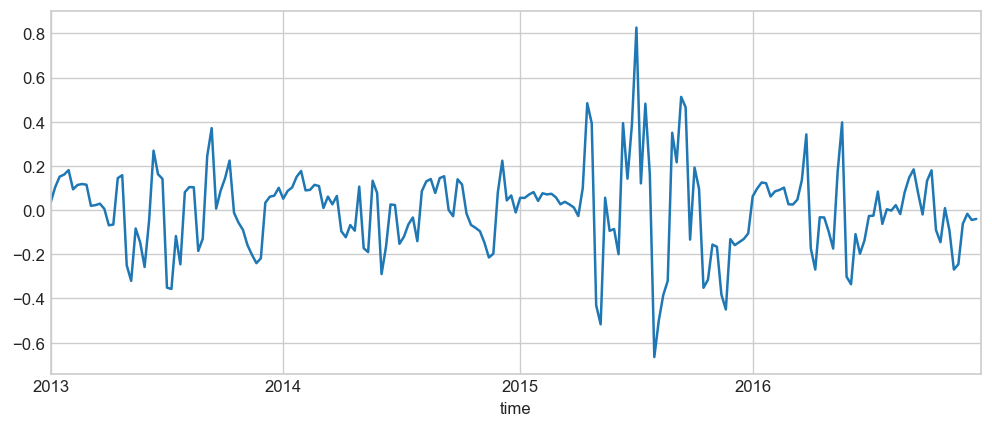

In [42]:
plt.figure(figsize=plt.figaspect(0.4))
anomaly['2013':'2016'].plot()